In [5]:
#import the useful libraries
import pandas as pd
import numpy as np
import spacy
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AffinityPropagation, SpectralClustering
from scipy.spatial.distance import pdist, euclidean
from sklearn import metrics

In [1]:
# load the dataset about bloggers
autors_data = pd.read_csv( 'autors.csv',sep=',',  header=0)
autors_data.head()

,Author ID,Name,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Average Number Of Words In Posts
0,1,Jason Kincaid,43,43,4.257910,5.858018
1,2,Michael Arrington,114,114,4.136101,5.645050
2,3,Erick Schonfeld,56,57,4.114451,5.660201
3,4,John Biggs,22,22,3.872279,5.293720
4,5,MG Siegler,66,65,3.923442,5.509575


In [280]:
autors_data.shape

(107, 6)

In [281]:
autors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
Author ID                                               107 non-null int64
Name                                                    107 non-null object
MEIBI                                                   107 non-null int64
MEIBIX                                                  107 non-null int64
Average Number Of Words In Posts (without stopwords)    107 non-null float64
Average Number Of Words In Posts                        107 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 5.1+ KB


In [282]:
duplicateRows = autors_data[autors_data.duplicated(keep=False)] 
duplicateRows

,Author ID,Name,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Average Number Of Words In Posts


Author ID - id of the author

Name - name of the author

MEIBI - a metric for identifying blogger influence

MEIBIX - a metric for determining the quality of a blog in terms of the number and time of links to comments

Average Number Of Words In Posts - average number of words in posts

Average Number Of Words In Posts (without stopwords) - the average number of words in posts without stopwords

In [2]:
# load the dataset about posts
posts_data = pd.read_csv( 'posts.csv',sep=',',  header=0)
posts_data.head()

,Post ID,Title,Blogger's Name,Blogger's ID,Number of comments,Content,Date,Number of retrieved inlinks,Number of retrieved comments
0,1,We Just Tested Twitter&#8217;s @anywhere Platf...,Jason Kincaid,1,14,"During his keynote at SXSW last month, Twitter...",2010-04-01,0,14
1,2,Facebook To Launch &#8216;Relationships&#8217;...,Jason Kincaid,1,30,Later this month Facebook is holding its f8 co...,2010-04-01,0,30
2,3,NYTimes Request Correction/Removal Of Our Post...,Michael Arrington,2,38,A NYTimes communications person emailed to ask...,2010-04-01,4,38
3,4,Google Shows How HTML5 Can Run Quake In The Br...,Erick Schonfeld,3,26,A lot of attention lately has been put on the ...,2010-04-01,10,26
4,5,The iPad: Apple&#8217;s Trojan Horse,John Biggs,4,49,Something struck me about Apple&#8217;s handli...,2010-04-01,1,49


In [284]:
posts_data.shape

(19464, 9)

In [285]:
posts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19464 entries, 0 to 19463
Data columns (total 9 columns):
Post ID                         19464 non-null int64
Title                           19459 non-null object
Blogger's Name                  19464 non-null object
Blogger's ID                    19464 non-null int64
Number of comments              19464 non-null int64
Content                         19383 non-null object
Date                            19464 non-null object
Number of retrieved inlinks     19464 non-null int64
Number of retrieved comments    19464 non-null int64
dtypes: int64(5), object(4)
memory usage: 1.3+ MB


In [286]:
duplicateRows = posts_data[posts_data.duplicated(keep=False)] 
duplicateRows

,Post ID,Title,Blogger's Name,Blogger's ID,Number of comments,Content,Date,Number of retrieved inlinks,Number of retrieved comments


Post ID - id of the post

Title - title

Blogger's Name - blogger's name

Blogger's ID - id blogger

Number of comments - the number of comments

Content - the text of the post

Date - the date the post was created

Number of retrieved inlinks - Number of retrieved links

Number of retrieved comments - Number of received comments

# 1. Preprocessing data

Formatting the creation date of a post  to calculate blogging experience:

In [287]:
def date_formatting(Date):
    year = Date.split('-')[0]
    year_new = int(year)
    month = Date.split('-')[1]
    mount_new = int(month)
    day = Date.split('-')[2]
    day_new = int(day)
    year2 = year_new + (mount_new * 30 + day_new) / 365
    return year2
posts_data['Year'] = posts_data['Date'].apply(date_formatting)
posts_data.head()

,Post ID,Title,Blogger's Name,Blogger's ID,Number of comments,Content,Date,Number of retrieved inlinks,Number of retrieved comments,Year
0,1,We Just Tested Twitter&#8217;s @anywhere Platf...,Jason Kincaid,1,14,"During his keynote at SXSW last month, Twitter...",2010-04-01,0,14,2010.331507
1,2,Facebook To Launch &#8216;Relationships&#8217;...,Jason Kincaid,1,30,Later this month Facebook is holding its f8 co...,2010-04-01,0,30,2010.331507
2,3,NYTimes Request Correction/Removal Of Our Post...,Michael Arrington,2,38,A NYTimes communications person emailed to ask...,2010-04-01,4,38,2010.331507
3,4,Google Shows How HTML5 Can Run Quake In The Br...,Erick Schonfeld,3,26,A lot of attention lately has been put on the ...,2010-04-01,10,26,2010.331507
4,5,The iPad: Apple&#8217;s Trojan Horse,John Biggs,4,49,Something struck me about Apple&#8217;s handli...,2010-04-01,1,49,2010.331507


Data aggregation by Blogger ID:

In [288]:
# number of posts per blogger:
aggr_posts1 = posts_data.groupby(by=["Blogger's ID"], as_index=False)['Post ID'].count()
aggr_posts1

,Blogger's ID,Post ID
0,1,1821
1,2,4903
2,3,2685
3,4,698
4,5,1435
...,...,...
102,103,1
103,104,1
104,105,14
105,106,68


In [289]:
# average number of comments, links received, comments received, maximum and minimum year of post creation
# for each blogger:
aggr_posts2 = posts_data.groupby(["Blogger's ID"], as_index=False).agg(
    Avg_comments = ('Number of comments','mean'),
    Avg_retrieved_inlinks = ('Number of retrieved inlinks', 'mean'),
    Avg_retrieved_comments = ('Number of retrieved comments', 'mean'),
    Year_max = ('Year', 'max'), 
    Year_min = ('Year', 'min')
  )

aggr_posts2

,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Year_max,Year_min
0,45.321801,7.912685,34.092257,2010.331507,2008.353425
1,64.686518,14.616153,50.876810,2010.331507,2005.523288
2,30.183985,10.609311,35.492365,2010.331507,2007.805479
3,52.630372,4.839542,34.277937,2010.331507,2006.698630
4,66.950523,10.611150,50.154704,2010.331507,2009.361644
...,...,...,...,...,...
102,34.000000,8.000000,30.000000,2007.178082,2007.178082
103,47.000000,10.000000,37.000000,2007.150685,2007.150685
104,48.285714,12.857143,25.642857,2007.090411,2006.471233
105,40.573529,8.102941,31.750000,2007.027397,2006.978082


In [291]:
# calculation of blogging experience
aggr_posts2["Blogger's Age"] = aggr_posts2['Year_max'] - aggr_posts2['Year_min']
aggr_posts2.drop(['Year_max', "Year_min"],  axis=1,  inplace=True)
aggr_posts2

,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Blogger's Age
0,45.321801,7.912685,34.092257,1.978082
1,64.686518,14.616153,50.876810,4.808219
2,30.183985,10.609311,35.492365,2.526027
3,52.630372,4.839542,34.277937,3.632877
4,66.950523,10.611150,50.154704,0.969863
...,...,...,...,...
102,34.000000,8.000000,30.000000,0.000000
103,47.000000,10.000000,37.000000,0.000000
104,48.285714,12.857143,25.642857,0.619178
105,40.573529,8.102941,31.750000,0.049315


Combining post subject texts for each blogger:

In [298]:
posts_data['Title'] = posts_data['Title'].astype(str)

In [302]:
texts = posts_data.groupby("Blogger's ID")['Title'].apply(lambda x: "%s" % ', '.join(x))

texts = pd.DataFrame(text_title)
texts

,Title
Blogger's ID,
1,We Just Tested Twitter&#8217;s @anywhere Platf...
2,NYTimes Request Correction/Removal Of Our Post...
3,Google Shows How HTML5 Can Run Quake In The Br...
4,"The iPad: Apple&#8217;s Trojan Horse, Live: Fo..."
5,"Twitter Tweaks Search, A Few Popular Tweets No..."
...,...
103,Next Generation Entrepreneurs Compete At Googl...
104,ScoopLive Turns Us All into Paparazzi
105,Stockpickr in deal with The Street: More to Co...


Processing text data with the NLP library (SpaCy).

In [300]:
nlp = spacy.load('en_core_web_sm')

In [303]:
# Definition of word vectors that represent each word numerically and will be used as features in the clustering model.
# Combining all word vectors into one document vector:

with nlp.disable_pipes():
    doc_vectors = np.array([nlp(Title).vector for Title in texts.Title])
    
doc_vectors.shape

(107, 96)

In [304]:
doc_vectors=pd.DataFrame(doc_vectors)
doc_vectors

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-0.038302,-0.223028,0.276253,0.032574,0.097602,-0.020215,-0.201577,-0.050735,-0.198980,-0.008047,...,0.082465,-0.353470,-0.196663,0.338557,-0.075506,-0.192279,0.168388,0.140897,0.165239,0.119539
1,-0.094202,-0.248237,0.253042,0.003226,0.063840,-0.109549,-0.227689,-0.092068,-0.195728,0.009029,...,0.093641,-0.329169,-0.142363,0.280398,-0.038773,-0.150966,0.172575,0.137871,0.154038,0.127049
2,-0.045766,-0.208363,0.248778,0.060276,0.077820,-0.037999,-0.187347,-0.053067,-0.142992,-0.006362,...,0.076877,-0.345867,-0.167176,0.305053,-0.058608,-0.175050,0.152152,0.171579,0.121516,0.128285
3,-0.009999,-0.201368,0.228879,-0.011304,0.058429,-0.190822,-0.241981,-0.066625,-0.138643,0.026679,...,0.087507,-0.223033,-0.040227,0.113618,0.049863,-0.054122,0.189243,0.122537,0.077147,0.031178
4,-0.085057,-0.214583,0.209111,0.121948,0.044058,-0.043531,-0.217658,-0.096633,-0.174499,-0.048840,...,0.075713,-0.322362,-0.142135,0.328681,-0.052293,-0.170115,0.082704,0.158823,0.141403,0.120674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.362135,-0.406061,0.338607,-0.046530,0.367050,-0.040657,-0.225356,0.053446,0.080019,-0.016117,...,0.025657,-0.772757,-0.507034,0.403074,-0.366205,-0.280504,0.067194,0.435940,0.280702,-0.091598
103,0.051712,0.191215,0.121114,-0.145755,0.458810,0.408195,0.056283,-0.535020,0.032668,-0.219812,...,0.356577,-0.156732,-0.165911,0.430310,-0.660101,0.050177,-0.293106,0.355279,-0.047999,0.069159
104,0.058289,-0.223301,0.146036,0.045694,0.195345,-0.061173,-0.106762,-0.123791,-0.118237,-0.025015,...,0.095236,-0.240563,0.004847,0.058436,-0.031290,-0.017112,0.169066,0.242731,0.095017,0.011777
105,-0.000258,-0.226828,0.292489,0.048292,0.082815,0.024061,-0.187429,-0.061939,-0.221086,0.000872,...,0.079432,-0.306978,-0.180054,0.316126,-0.121739,-0.204823,0.151850,0.179421,0.169585,0.063923


Merging all aggregated tables by posts:

In [305]:
aggr_posts = pd.concat(
    [aggr_posts1, aggr_posts2, doc_vectors], axis=1 )

aggr_posts

,Blogger's ID,Post ID,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Blogger's Age,0,1,2,3,...,86,87,88,89,90,91,92,93,94,95
0,1,1821,45.321801,7.912685,34.092257,1.978082,-0.038302,-0.223028,0.276253,0.032574,...,0.082465,-0.353470,-0.196663,0.338557,-0.075506,-0.192279,0.168388,0.140897,0.165239,0.119539
1,2,4903,64.686518,14.616153,50.876810,4.808219,-0.094202,-0.248237,0.253042,0.003226,...,0.093641,-0.329169,-0.142363,0.280398,-0.038773,-0.150966,0.172575,0.137871,0.154038,0.127049
2,3,2685,30.183985,10.609311,35.492365,2.526027,-0.045766,-0.208363,0.248778,0.060276,...,0.076877,-0.345867,-0.167176,0.305053,-0.058608,-0.175050,0.152152,0.171579,0.121516,0.128285
3,4,698,52.630372,4.839542,34.277937,3.632877,-0.009999,-0.201368,0.228879,-0.011304,...,0.087507,-0.223033,-0.040227,0.113618,0.049863,-0.054122,0.189243,0.122537,0.077147,0.031178
4,5,1435,66.950523,10.611150,50.154704,0.969863,-0.085057,-0.214583,0.209111,0.121948,...,0.075713,-0.322362,-0.142135,0.328681,-0.052293,-0.170115,0.082704,0.158823,0.141403,0.120674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,1,34.000000,8.000000,30.000000,0.000000,0.362135,-0.406061,0.338607,-0.046530,...,0.025657,-0.772757,-0.507034,0.403074,-0.366205,-0.280504,0.067194,0.435940,0.280702,-0.091598
103,104,1,47.000000,10.000000,37.000000,0.000000,0.051712,0.191215,0.121114,-0.145755,...,0.356577,-0.156732,-0.165911,0.430310,-0.660101,0.050177,-0.293106,0.355279,-0.047999,0.069159
104,105,14,48.285714,12.857143,25.642857,0.619178,0.058289,-0.223301,0.146036,0.045694,...,0.095236,-0.240563,0.004847,0.058436,-0.031290,-0.017112,0.169066,0.242731,0.095017,0.011777
105,106,68,40.573529,8.102941,31.750000,0.049315,-0.000258,-0.226828,0.292489,0.048292,...,0.079432,-0.306978,-0.180054,0.316126,-0.121739,-0.204823,0.151850,0.179421,0.169585,0.063923


In [307]:
aggr_posts.rename(
    columns={'Post ID': 'Posts_count'}, inplace=True)
aggr_posts

,Blogger's ID,Posts_count,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Blogger's Age,0,1,2,3,...,86,87,88,89,90,91,92,93,94,95
0,1,1821,45.321801,7.912685,34.092257,1.978082,-0.038302,-0.223028,0.276253,0.032574,...,0.082465,-0.353470,-0.196663,0.338557,-0.075506,-0.192279,0.168388,0.140897,0.165239,0.119539
1,2,4903,64.686518,14.616153,50.876810,4.808219,-0.094202,-0.248237,0.253042,0.003226,...,0.093641,-0.329169,-0.142363,0.280398,-0.038773,-0.150966,0.172575,0.137871,0.154038,0.127049
2,3,2685,30.183985,10.609311,35.492365,2.526027,-0.045766,-0.208363,0.248778,0.060276,...,0.076877,-0.345867,-0.167176,0.305053,-0.058608,-0.175050,0.152152,0.171579,0.121516,0.128285
3,4,698,52.630372,4.839542,34.277937,3.632877,-0.009999,-0.201368,0.228879,-0.011304,...,0.087507,-0.223033,-0.040227,0.113618,0.049863,-0.054122,0.189243,0.122537,0.077147,0.031178
4,5,1435,66.950523,10.611150,50.154704,0.969863,-0.085057,-0.214583,0.209111,0.121948,...,0.075713,-0.322362,-0.142135,0.328681,-0.052293,-0.170115,0.082704,0.158823,0.141403,0.120674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,1,34.000000,8.000000,30.000000,0.000000,0.362135,-0.406061,0.338607,-0.046530,...,0.025657,-0.772757,-0.507034,0.403074,-0.366205,-0.280504,0.067194,0.435940,0.280702,-0.091598
103,104,1,47.000000,10.000000,37.000000,0.000000,0.051712,0.191215,0.121114,-0.145755,...,0.356577,-0.156732,-0.165911,0.430310,-0.660101,0.050177,-0.293106,0.355279,-0.047999,0.069159
104,105,14,48.285714,12.857143,25.642857,0.619178,0.058289,-0.223301,0.146036,0.045694,...,0.095236,-0.240563,0.004847,0.058436,-0.031290,-0.017112,0.169066,0.242731,0.095017,0.011777
105,106,68,40.573529,8.102941,31.750000,0.049315,-0.000258,-0.226828,0.292489,0.048292,...,0.079432,-0.306978,-0.180054,0.316126,-0.121739,-0.204823,0.151850,0.179421,0.169585,0.063923


Merging tables by posts and bloggers:

In [387]:
data = pd.merge(
    left=autors_data,  
    right=aggr_posts,  
    left_on='Author ID',  
    right_on="Blogger's ID", 
    how='inner' 
)

data

,Author ID,Name,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Average Number Of Words In Posts,Blogger's ID,Posts_count,Avg_comments,Avg_retrieved_inlinks,...,86,87,88,89,90,91,92,93,94,95
0,1,Jason Kincaid,43,43,4.257910,5.858018,1,1821,45.321801,7.912685,...,0.082465,-0.353470,-0.196663,0.338557,-0.075506,-0.192279,0.168388,0.140897,0.165239,0.119539
1,2,Michael Arrington,114,114,4.136101,5.645050,2,4903,64.686518,14.616153,...,0.093641,-0.329169,-0.142363,0.280398,-0.038773,-0.150966,0.172575,0.137871,0.154038,0.127049
2,3,Erick Schonfeld,56,57,4.114451,5.660201,3,2685,30.183985,10.609311,...,0.076877,-0.345867,-0.167176,0.305053,-0.058608,-0.175050,0.152152,0.171579,0.121516,0.128285
3,4,John Biggs,22,22,3.872279,5.293720,4,698,52.630372,4.839542,...,0.087507,-0.223033,-0.040227,0.113618,0.049863,-0.054122,0.189243,0.122537,0.077147,0.031178
4,5,MG Siegler,66,65,3.923442,5.509575,5,1435,66.950523,10.611150,...,0.075713,-0.322362,-0.142135,0.328681,-0.052293,-0.170115,0.082704,0.158823,0.141403,0.120674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,Vivian Wu,1,1,4.393893,5.849593,103,1,34.000000,8.000000,...,0.025657,-0.772757,-0.507034,0.403074,-0.366205,-0.280504,0.067194,0.435940,0.280702,-0.091598
103,104,Wil Schroter,1,1,4.063939,5.715827,104,1,47.000000,10.000000,...,0.356577,-0.156732,-0.165911,0.430310,-0.660101,0.050177,-0.293106,0.355279,-0.047999,0.069159
104,105,Neil Kjeldsen,3,3,4.103039,5.764594,105,14,48.285714,12.857143,...,0.095236,-0.240563,0.004847,0.058436,-0.031290,-0.017112,0.169066,0.242731,0.095017,0.011777
105,106,Natali Del Conte,4,4,4.067162,5.650984,106,68,40.573529,8.102941,...,0.079432,-0.306978,-0.180054,0.316126,-0.121739,-0.204823,0.151850,0.179421,0.169585,0.063923


Selection and processing of features for clustering:

In [388]:
#remove unnecessary variables and Average Number Of Words In Posts, leave without noise words
data.drop(['Average Number Of Words In Posts', "Blogger's ID"],  axis=1,  inplace=True)
data.head()

,Author ID,Name,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Posts_count,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Blogger's Age,...,86,87,88,89,90,91,92,93,94,95
0,1,Jason Kincaid,43,43,4.257910,1821,45.321801,7.912685,34.092257,1.978082,...,0.082465,-0.353470,-0.196663,0.338557,-0.075506,-0.192279,0.168388,0.140897,0.165239,0.119539
1,2,Michael Arrington,114,114,4.136101,4903,64.686518,14.616153,50.876810,4.808219,...,0.093641,-0.329169,-0.142363,0.280398,-0.038773,-0.150966,0.172575,0.137871,0.154038,0.127049
2,3,Erick Schonfeld,56,57,4.114451,2685,30.183985,10.609311,35.492365,2.526027,...,0.076877,-0.345867,-0.167176,0.305053,-0.058608,-0.175050,0.152152,0.171579,0.121516,0.128285
3,4,John Biggs,22,22,3.872279,698,52.630372,4.839542,34.277937,3.632877,...,0.087507,-0.223033,-0.040227,0.113618,0.049863,-0.054122,0.189243,0.122537,0.077147,0.031178
4,5,MG Siegler,66,65,3.923442,1435,66.950523,10.611150,50.154704,0.969863,...,0.075713,-0.322362,-0.142135,0.328681,-0.052293,-0.170115,0.082704,0.158823,0.141403,0.120674


In [310]:
features = data[data.columns[2:]]
features 

,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Posts_count,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Blogger's Age,0,1,...,86,87,88,89,90,91,92,93,94,95
0,43,43,4.257910,1821,45.321801,7.912685,34.092257,1.978082,-0.038302,-0.223028,...,0.082465,-0.353470,-0.196663,0.338557,-0.075506,-0.192279,0.168388,0.140897,0.165239,0.119539
1,114,114,4.136101,4903,64.686518,14.616153,50.876810,4.808219,-0.094202,-0.248237,...,0.093641,-0.329169,-0.142363,0.280398,-0.038773,-0.150966,0.172575,0.137871,0.154038,0.127049
2,56,57,4.114451,2685,30.183985,10.609311,35.492365,2.526027,-0.045766,-0.208363,...,0.076877,-0.345867,-0.167176,0.305053,-0.058608,-0.175050,0.152152,0.171579,0.121516,0.128285
3,22,22,3.872279,698,52.630372,4.839542,34.277937,3.632877,-0.009999,-0.201368,...,0.087507,-0.223033,-0.040227,0.113618,0.049863,-0.054122,0.189243,0.122537,0.077147,0.031178
4,66,65,3.923442,1435,66.950523,10.611150,50.154704,0.969863,-0.085057,-0.214583,...,0.075713,-0.322362,-0.142135,0.328681,-0.052293,-0.170115,0.082704,0.158823,0.141403,0.120674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,4.393893,1,34.000000,8.000000,30.000000,0.000000,0.362135,-0.406061,...,0.025657,-0.772757,-0.507034,0.403074,-0.366205,-0.280504,0.067194,0.435940,0.280702,-0.091598
103,1,1,4.063939,1,47.000000,10.000000,37.000000,0.000000,0.051712,0.191215,...,0.356577,-0.156732,-0.165911,0.430310,-0.660101,0.050177,-0.293106,0.355279,-0.047999,0.069159
104,3,3,4.103039,14,48.285714,12.857143,25.642857,0.619178,0.058289,-0.223301,...,0.095236,-0.240563,0.004847,0.058436,-0.031290,-0.017112,0.169066,0.242731,0.095017,0.011777
105,4,4,4.067162,68,40.573529,8.102941,31.750000,0.049315,-0.000258,-0.226828,...,0.079432,-0.306978,-0.180054,0.316126,-0.121739,-0.204823,0.151850,0.179421,0.169585,0.063923


In [325]:
#Downsize with PCA, leaving as many components as needed to explain at least 90% of the variance in the original (scaled) data:

scaled_features = MinMaxScaler().fit_transform(features)

pca = PCA(n_components=30).fit(scaled_features)

for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

1 component: 19.29% of initial variance
2 component: 9.61% of initial variance
3 component: 9.33% of initial variance
4 component: 6.41% of initial variance
5 component: 4.92% of initial variance
6 component: 3.82% of initial variance
7 component: 3.74% of initial variance
8 component: 3.32% of initial variance
9 component: 3.12% of initial variance
10 component: 2.99% of initial variance
11 component: 2.57% of initial variance
12 component: 2.49% of initial variance
13 component: 2.28% of initial variance
14 component: 1.98% of initial variance
15 component: 1.66% of initial variance
16 component: 1.63% of initial variance
17 component: 1.57% of initial variance
18 component: 1.32% of initial variance
19 component: 1.26% of initial variance
20 component: 1.18% of initial variance
21 component: 1.11% of initial variance
22 component: 1.02% of initial variance
23 component: 0.98% of initial variance
24 component: 0.86% of initial variance
25 component: 0.83% of initial variance
26 compo

26 main components need to be identified.

Data visualization in projection on the first two principal components.

In [326]:
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.56895616, -0.03702991],
       [ 0.53707645, -0.48818146],
       [ 0.45182751, -0.15519809],
       [-0.30987859, -0.40005027],
       [ 0.40019732, -0.19218713],
       [-0.82555686, -0.28306072],
       [ 0.78791617,  0.19429808],
       [ 0.65357214, -0.16896943],
       [-0.46402559, -0.40325355],
       [-0.63719955, -0.30165388]])

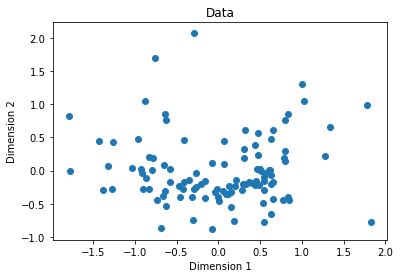

In [327]:
%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Text(0.5, 1.0, 'MNIST. t-SNE projection')

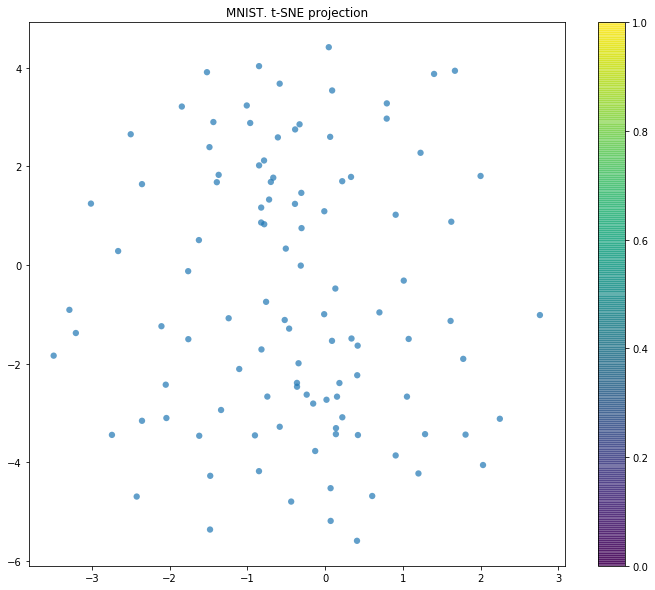

In [342]:
#  visualization with t-SNE projection

tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(scaled_features)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

# 2. Clustering

Selecting the number of clusters using  the within cluster sum of squares (WCSS):

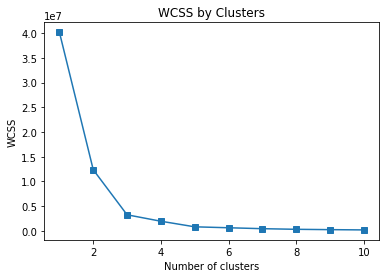

In [335]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)

    kmeans.fit(features.values)
    
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss, marker='s')
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater tightness) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

# 2.1.KMeans

In [336]:
# train the model on data with reduced dimension due to PCA
pca = PCA(n_components=26).fit(scaled_features)
features_26d = pca.transform(scaled_features)

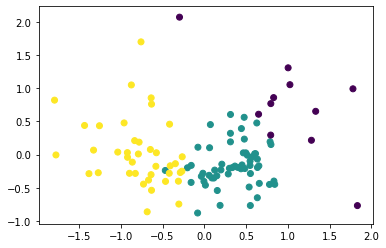

In [371]:
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

km_clusters = model.fit_predict(features_26d)

plt.scatter(features_2d[:,0],features_2d[:,1], c=km_clusters)
plt.show()


Text(0.5, 1.0, 'MNIST. t-SNE projection')

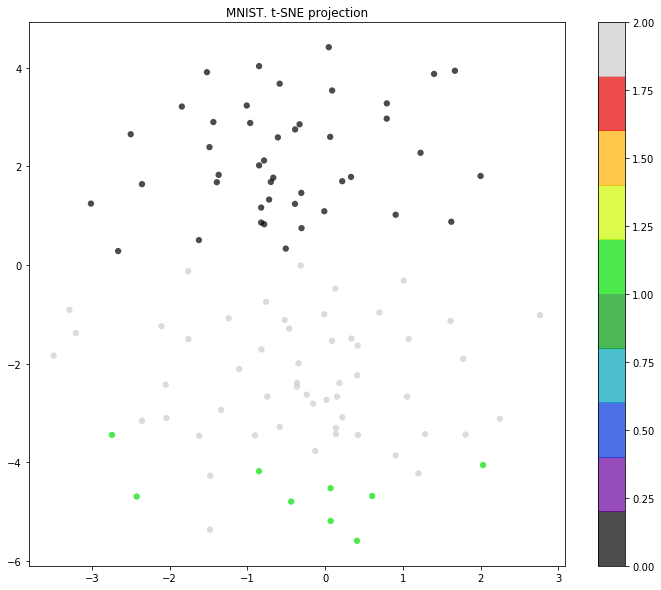

In [343]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40, c=km_clusters,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

# 2.2. Agglomerative Clustering

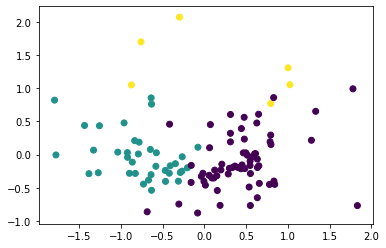

In [345]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features_26d)

plt.scatter(features_2d[:,0],features_2d[:,1], c=agg_clusters)
plt.show()

Text(0.5, 1.0, 'MNIST. t-SNE projection')

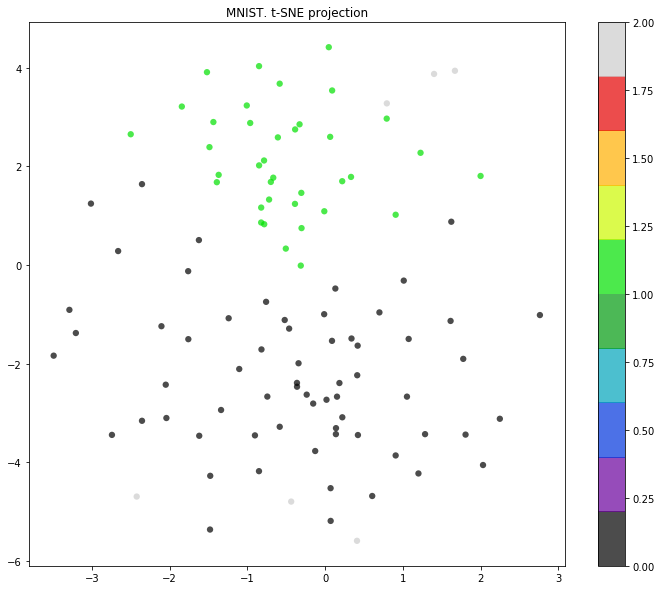

In [355]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40, c=agg_clusters,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

Illustration of hierarchical clustering of data using a dendrogram.

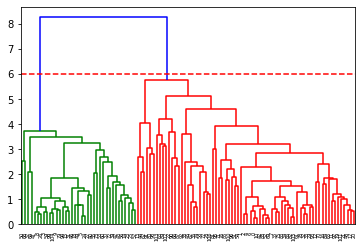

In [353]:
dend = shc.dendrogram(shc.linkage(features_26d, method='ward'))  
plt.axhline(y=6, color='r', linestyle='--')

plt.show()

Starting with the number of clusters that corresponds to the points in the data, finally, limiting the maximum distance between clusters for joining, at a level of about 6, I get 3 clusters.

Agglomerative clustering without a fixed number of clusters, with distance_threshold=5:

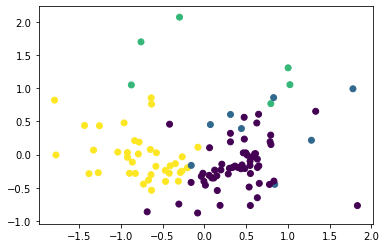

In [359]:
agg_model2 = AgglomerativeClustering(
    n_clusters=None,  
    affinity='euclidean', 
    linkage='ward',  
    distance_threshold=5) 

agg_clusters2 = agg_model2.fit_predict(features_26d)

plt.scatter(features_2d[:,0],features_2d[:,1], c=agg_clusters2)
plt.show()

Text(0.5, 1.0, 'MNIST. t-SNE projection')

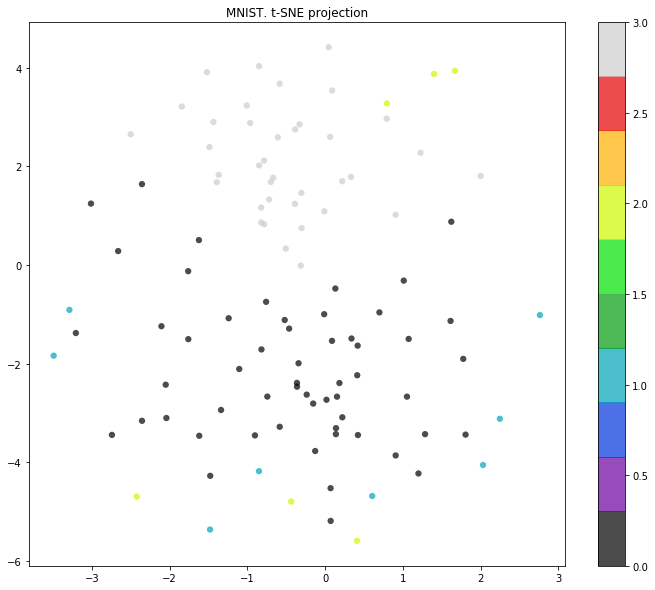

In [357]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40, c=agg_clusters2,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

The result is 4 clusters.

# 2.3. Affinity Propagation

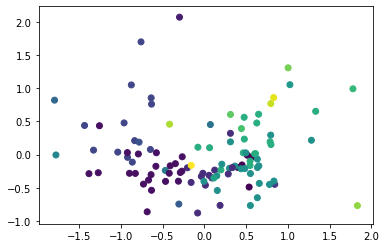

In [379]:
Aff_mdl = AffinityPropagation()

Aff_clusters = Aff_mdl.fit_predict(features_26d)

plt.scatter(features_2d[:,0],features_2d[:,1], c=Aff_clusters)
plt.show()

Text(0.5, 1.0, 'MNIST. t-SNE projection')

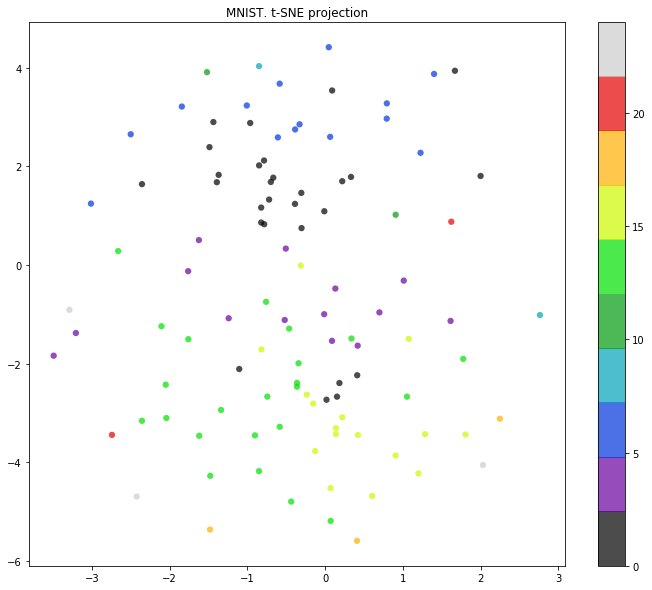

In [377]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40, c=Aff_clusters,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

# 2.4. Spectral Clustering

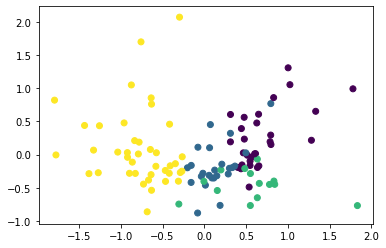

In [380]:
Spect_mdl = SpectralClustering(n_clusters=4, random_state=1,
                                     affinity='nearest_neighbors')
Spect_clusters = Spect_mdl.fit_predict(features_26d)

plt.scatter(features_2d[:,0],features_2d[:,1], c=Spect_clusters)
plt.show()

Text(0.5, 1.0, 'MNIST. t-SNE projection')

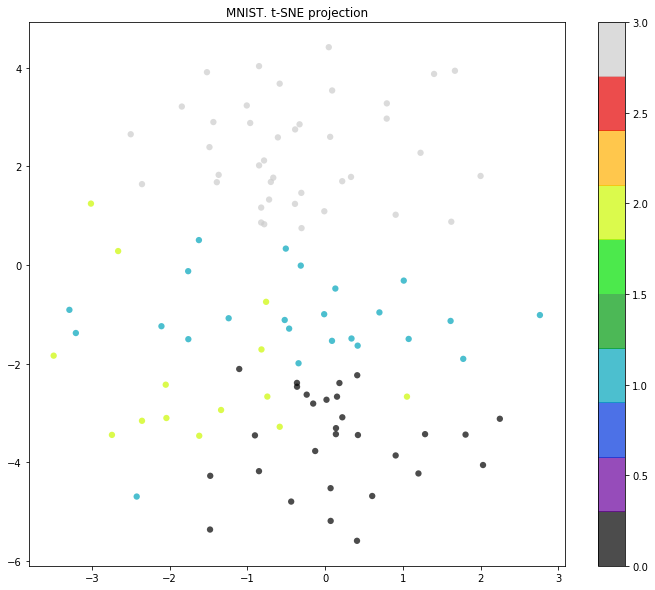

In [381]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40, c=Spect_clusters,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

# 3. Comparison of clustering results by different algorithms

I use the following metrics:

Silhouette - the value lies in the range [-1, 1]. Values close to -1 correspond to bad (scattered) clusterings, values close to zero indicate that the clusters intersect and overlap each other, values close to 1 correspond to "dense" well-defined clusters.

Davies–Bouldin index - must be minimized to 0 for clustering to grow, the lower the value, the better the separation of clusters and the "tightness" within clusters.

In [364]:
# Davies–Bouldin index

def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

    return(np.max(db) / n_cluster)

print(DaviesBouldin(features.values, km_clusters))

In [375]:
algorithms = [model, agg_model, agg_model2, Aff_mdl, Spect_mdl]

metric = []
for algo in algorithms:
    algo.fit(features_26d)
    data.append(({
        'Silhouette': metrics.silhouette_score(features_26d, algo.labels_),
        'DaviesBouldin': DaviesBouldin(features_26d, algo.labels_)
    }))

results = pd.DataFrame(metric=metric, columns=['Silhouette', 'DaviesBouldin'],
                       index=['K-means', 'Agglomerative 3k', 'Agglomerative 4k', 'Affinity', 'SpectralClustering'])

results


,Silhouette,DaviesBouldin
K-means,0.159112,0.741779
Agglomerative 3k,0.146586,0.634050
Agglomerative 4k,0.152914,0.592942
Affinity,0.058266,0.102129
SpectralClustering,0.089184,0.691881


As a result, the Agglomerative Clustering algorithm with 4 clusters showed the best results.

In [391]:
clusters=pd.DataFrame(agg_clusters2, columns=['Clusters'])
data = data[data.columns[0:10]]
data

,Author ID,Name,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Posts_count,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Blogger's Age
0,1,Jason Kincaid,43,43,4.257910,1821,45.321801,7.912685,34.092257,1.978082
1,2,Michael Arrington,114,114,4.136101,4903,64.686518,14.616153,50.876810,4.808219
2,3,Erick Schonfeld,56,57,4.114451,2685,30.183985,10.609311,35.492365,2.526027
3,4,John Biggs,22,22,3.872279,698,52.630372,4.839542,34.277937,3.632877
4,5,MG Siegler,66,65,3.923442,1435,66.950523,10.611150,50.154704,0.969863
...,...,...,...,...,...,...,...,...,...,...
102,103,Vivian Wu,1,1,4.393893,1,34.000000,8.000000,30.000000,0.000000
103,104,Wil Schroter,1,1,4.063939,1,47.000000,10.000000,37.000000,0.000000
104,105,Neil Kjeldsen,3,3,4.103039,14,48.285714,12.857143,25.642857,0.619178
105,106,Natali Del Conte,4,4,4.067162,68,40.573529,8.102941,31.750000,0.049315


In [392]:
result = pd.concat(
    [data, clusters], axis=1 )

result

,Author ID,Name,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Posts_count,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Blogger's Age,Clusters
0,1,Jason Kincaid,43,43,4.257910,1821,45.321801,7.912685,34.092257,1.978082,0
1,2,Michael Arrington,114,114,4.136101,4903,64.686518,14.616153,50.876810,4.808219,0
2,3,Erick Schonfeld,56,57,4.114451,2685,30.183985,10.609311,35.492365,2.526027,0
3,4,John Biggs,22,22,3.872279,698,52.630372,4.839542,34.277937,3.632877,3
4,5,MG Siegler,66,65,3.923442,1435,66.950523,10.611150,50.154704,0.969863,0
...,...,...,...,...,...,...,...,...,...,...,...
102,103,Vivian Wu,1,1,4.393893,1,34.000000,8.000000,30.000000,0.000000,1
103,104,Wil Schroter,1,1,4.063939,1,47.000000,10.000000,37.000000,0.000000,1
104,105,Neil Kjeldsen,3,3,4.103039,14,48.285714,12.857143,25.642857,0.619178,3
105,106,Natali Del Conte,4,4,4.067162,68,40.573529,8.102941,31.750000,0.049315,0


In [393]:
aggr_result = result.groupby(by=['Clusters']).mean().reset_index()
aggr_result.head()

,Clusters,Author ID,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Posts_count,Avg_comments,Avg_retrieved_inlinks,Avg_retrieved_comments,Blogger's Age
0,0,54.892857,10.464286,10.464286,4.302823,303.589286,56.816245,10.890343,43.294682,0.913454
1,1,78.750000,0.625000,0.625000,4.505820,1.125000,34.562500,5.000000,24.375000,0.010274
2,2,65.666667,1.000000,1.000000,4.227635,1.500000,67.083333,10.111111,48.527778,0.196347
3,3,45.405405,4.702703,4.702703,4.181605,66.081081,49.812299,5.486639,28.147697,0.813551


In [395]:
# count of bloggers in each cluster
aggr_result2 = result.groupby(by=['Clusters'])['Author ID'].count().reset_index()
aggr_result2.head()

,Clusters,Author ID
0,0,56
1,1,8
2,2,6
3,3,37


The largest clusters are 0 and 3.
From the results obtained, it can be seen that cluster 0 has the highest blog quality value, cluster 1 has the lowest, which is associated with fewer posts. We can also conclude that cluster 0 includes bloggers with more experience than cluster 1.
Clusters 1 and 2 do not differ in metrics of blog quality and blogging experience, but differ significantly in the number of comments, received comments and links.